## Activation functions

some personal notes on different activation functions (by no means exhaustive)

#### What are activation functions 
- Activation functions apply a **non-linear** transformation to the linear output Z = SUM(Wx + b) of a single node in a neural network, such that Activation = g(z) 

#### Why activation function
- Without non-linear activation functions, a multi-layer neural network would behave like a simple linear regressor or classifier. 
    - The linear output of layer [l] can be written as Z[l] = SUM(W[l]Z[l-1] + b[l]), where Z[l-1] is the linear output of the previous layer
    - Z[l-1] itself is equal to W[l-1]Z[l-2] + b[l-1], which can be continued all the way to the input x 
    - Thus, in each layer, we multiply the result of the previous layer by some constant (W) and add a constant (b). Thus, the linear output of any layer can be written as x multiplied by a chain of constants, which is nothing else than multiplying x by a single constant (which is a simple linear regression)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")

### Sigmoid activation function
- The Sigmoid function "squashes" numbers into the range 0-1 
- **Advantage**: 
    - Easy to calculate gradients (function is smooth and continuous) 
- **Disadvantage**
    - With small and large inputs, the curve of a Sigmoid becomes almost flat, so its derivative is almost zero. Since parameters during learning a generally updated as <parameter_new = parameter * -partial derivative of parameter>, learning becomes very slow ("vanishing gradients"). This is expecially true for **deep networks**, where values of z tend to become progressively larger with increased depth 
    


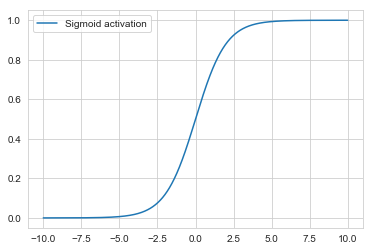

In [57]:
# define function
def sigmoid(Z):
    return 1/(1+np.exp(-Z))
            
# create dataset 
z = np.arange(-10, 10, 0.01)
a = sigmoid(z)

# plot
sns.lineplot(x=z, y=a, label = "Sigmoid activation")

### tanh activation function
- The tanh function "squashes" numbers into the range (-1)-1 
- **Advantage**: 
    - Easy to calculate gradients (function is smooth and continuous) 
    - Useful for output layer for classification tasks (TBD)
- **Disadvantage**
    - With small and large inputs, the curve of a tanh becomes almost flat, so its derivative is almost zero. Since parameters during learning a generally updated as <parameter_new = parameter * -partial derivative of parameter>, learning becomes very slow ("vanishing gradients") 

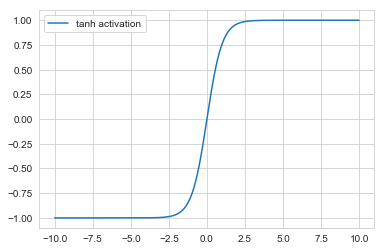

In [58]:
# define function
def tanh(Z):
    return (np.exp(Z) - np.exp(-Z)) / (np.exp(Z) + np.exp(-Z))
    
# create dataset 
z = np.arange(-10, 10, 0.01)
a = tanh(z)

# plot
sns.lineplot(x=z, y=a, label='tanh activation')

### ReLU (rectified linear unit) activation function
- The ReLU unit generally treats inputs depending on their range, e.g., has slope of 0 (or very small negative slope in case of a 'leaky ReLU' function) for all negative inputs and a positive slope (i.e., 1) for all positive values. Often used in image recognition  
- **Advantage**: 
    - No vanishing gradients for positive values (i.e., there is always a distinct slope and thus learning can happen). Since z tends to become larger in deeper networks, this allows for deep neural networks 
    - Computationally cheap
- **Disadvantage**
    - For negative values, it stops activating and learning can stop (i.e., if z of a neuron is always negative, its weight cannot be updated, because its derivative is always zero). If negative range slope of a leaky ReLU is chosen to be between 0-1, activation values can quickly dimish for deeper networks (for units with negative z's)   


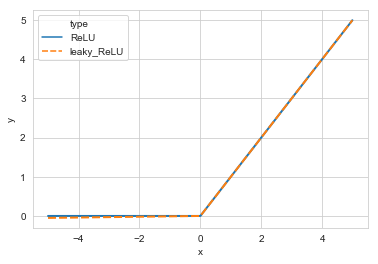

In [65]:
# ReLU 
def relu(Z):
    return np.maximum(0, Z)

# leaky ReLU 
def leaky_relu(Z):
    return np.where(Z > 0, Z, 0.01*Z)

# create dataset 
z = np.arange(-5, 5, 0.01)
a_01 = relu(z)
a_02 = leaky_relu(z)

df_01 = pd.DataFrame({'x': z, 'y': a_01, 'type':100}).replace(100, 'ReLU')
df_02 = pd.DataFrame({'x': z, 'y': a_02, 'type':100}).replace(100, 'leaky_ReLU')
df = pd.concat([df_01, df_02])

# plot 
sns.lineplot(x='x', y='y', hue='type', style='type', data=df, lw=2)

### Softplus activation function
- The Softplus function looks like a version of the ReLU function that is continously differentiable (i.e, does not have a "kink" at z=0). Interresingly, its derivative is the Sigmoid function 
- **Advantage**: 
    - Has a continuous derivative and covers at least a small range of negative z's with a meaningful gradient 
- **Disadvantage**
    - Computationally more expensive that ReLU 

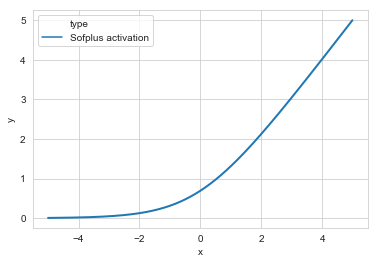

In [66]:
def softplus(z):
    return np.log(1+np.exp(z))

# create dataset 
z = np.arange(-5, 5, 0.01)
a = softplus(z)

df = pd.DataFrame({'x': z, 'y': a, 'type':100}).replace(100, 'Sofplus activation')

# plot 
sns.lineplot(x='x', y='y', hue='type', style='type', data=df, lw=2)

### ELU (exponential linear unit) activation function
- The ELU function resembles the ReLU function for positive inputs, but is exponentially shaped for negative inputs (where the exact shape depends on a hyperparameter alpha). Often used in image recognition 
- **Advantage**: 
    -TBD
- **Disadvantage**
    - Calculating the exponent costs computing power 

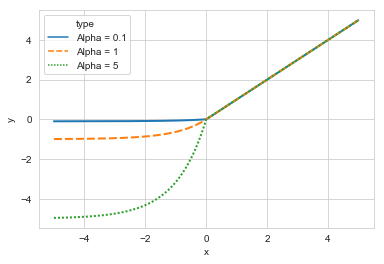

In [64]:
def ELU(Z, alpha):
    return np.where(Z > 0, Z, alpha*(np.exp(Z)-1))

# create dataset 
z = np.arange(-5, 5, 0.01)
a_01 = ELU(z, 0.1)
a_02 = ELU(z, 1)
a_03 = ELU(z, 5)

df_01 = pd.DataFrame({'x': z, 'y': a_01, 'type':100}).replace(100, 'Alpha = 0.1')
df_02 = pd.DataFrame({'x': z, 'y': a_02, 'type':100}).replace(100, 'Alpha = 1')
df_03 = pd.DataFrame({'x': z, 'y': a_03, 'type':100}).replace(100, 'Alpha = 5')
df = pd.concat([df_01, df_02, df_03])

# plot 
sns.lineplot(x='x', y='y', hue='type', style='type', data=df, lw=2)

### Swish activation function
- Multiplying Sigmoid(z) by z. Sometimes also introduces a parameter beta into the Sigmoid part of the function (see code below) 
- **Advantage**: 
    - Does not struggle with diminishing gradients as Sigmoid does
    - Has gradient for negative values of z (unlike ReLU) and seems to perform better than ReLU in deep neural networks
- **Disadvantage**
    - Computationally more expensive than ReLU

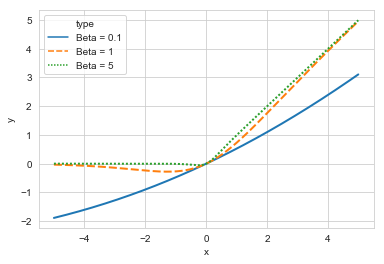

In [63]:
def swish(z):
    return z/(1+np.exp(-z))

def swish_beta(z, beta): 
    return z/(1+np.exp(beta*-z))

# create dataset 
z = np.arange(-5, 5, 0.01)
a_01 = swish_beta(z, 0.1)
a_02 = swish_beta(z, 1)
a_03 = swish_beta(z, 5)

df_01 = pd.DataFrame({'x': z, 'y': a_01, 'type':100}).replace(100, 'Beta = 0.1')
df_02 = pd.DataFrame({'x': z, 'y': a_02, 'type':100}).replace(100, 'Beta = 1')
df_03 = pd.DataFrame({'x': z, 'y': a_03, 'type':100}).replace(100, 'Beta = 5')
df = pd.concat([df_01, df_02, df_03])

# plot 
sns.lineplot(x='x', y='y', hue='type', style='type', data=df, lw=2)